<a href="https://colab.research.google.com/github/Velanjali/Basic-ML/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


**Reading the data from csv file**

In [241]:
data=pd.read_csv("train.csv")

In [242]:
df=data.copy()

In [243]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [244]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.500,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.000,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.050,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.925,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.000,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.800,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.925,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.650,F G63,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.100,NaN,S


In [245]:
data.shape

(891, 12)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [247]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


checking null values

In [248]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [249]:
df.drop(['PassengerId', 'Name','Ticket','Fare'],axis = 1, inplace = True)

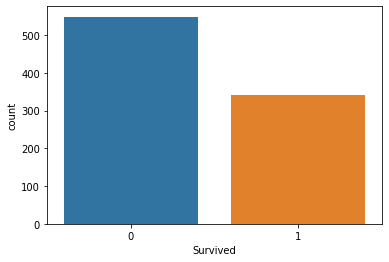

In [250]:
sns.countplot(x = 'Survived', data = data)

In [251]:
survived_percent = round(len(data[data['Survived'] == 1])/len(data) * 100,2)
print("Percentage of people survived = ", survived_percent,"%")

Percentage of people survived =  38.38 %


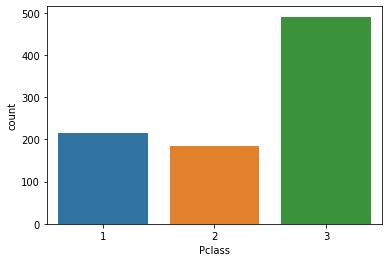

In [252]:
sns.countplot(x = 'Pclass', data = data)

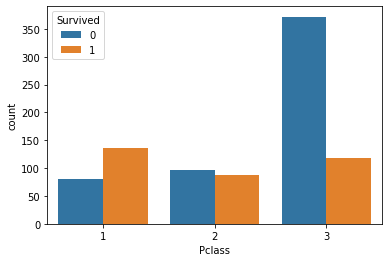

In [253]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)

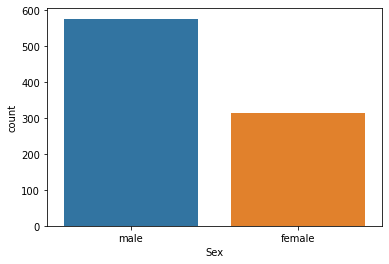

In [254]:
#As obvious male passengers were more than female passengers
sns.countplot(x = 'Sex', data = data)

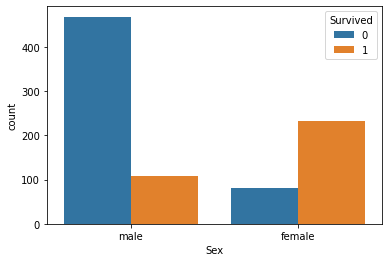

In [255]:
#More female passengers survuved than male passengers
sns.countplot(x = 'Sex',hue = 'Survived', data = data)


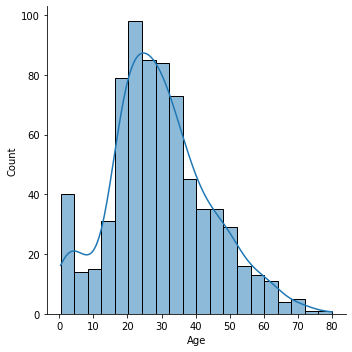

In [256]:
sns.displot(x = 'Age',kde = True, data = data)

In [257]:
print('Age mean = ', data['Age'].mean())
print('Age median = ', data['Age'].median())

Age mean =  29.69911764705882
Age median =  28.0


In [258]:
df['Age'].fillna(df['Age'].median(skipna = True),inplace = True)

<Figure size 720x720 with 0 Axes>

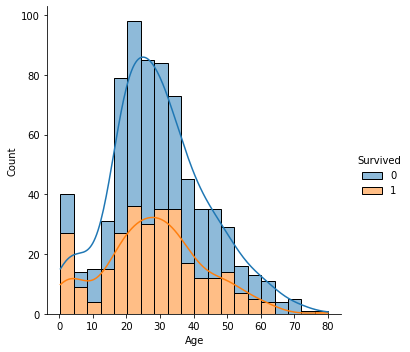

In [259]:
plt.figure(figsize = (10,10))
sns.displot(x = 'Age',hue = 'Survived', kde = True, data = data, multiple = 'stack')

In [260]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

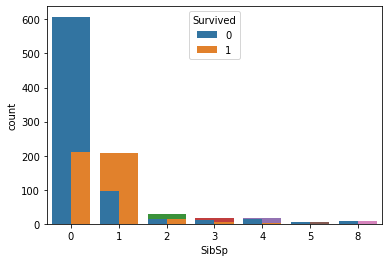

In [261]:
sns.countplot(x = 'SibSp',data = data)
sns.countplot(x='SibSp',hue='Survived',data=data)

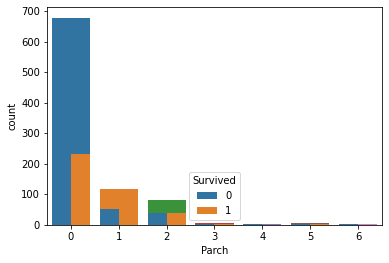

In [262]:
sns.countplot(x = 'Parch', data = data)
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

In [263]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [264]:
data['Cabin'].value_counts(dropna = False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
C87              1
D45              1
B42              1
C118             1
D28              1
Name: Cabin, Length: 148, dtype: int64

In [265]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [266]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [267]:
data['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [268]:
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

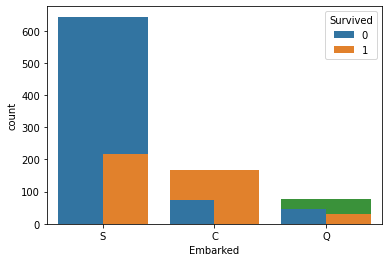

In [269]:
sns.countplot(x = 'Embarked',data = data)
sns.countplot(x = 'Embarked',hue = 'Survived',data = data)

In [270]:
df['TravelAlone'] = np.where((data["SibSp"]+data["Parch"])>0, 0, 1)

In [271]:
df.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [272]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,TravelAlone
0,0,3,male,22.0,S,0
1,1,1,female,38.0,C,0
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,0
4,0,3,male,35.0,S,1


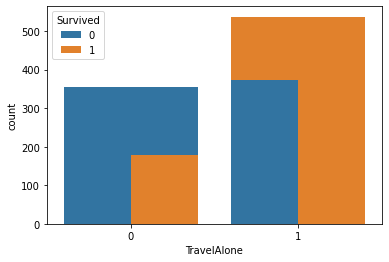

In [273]:
sns.countplot(x = 'TravelAlone', data = df)
sns.countplot(x = 'TravelAlone',hue = 'Survived' ,data = df)

In [274]:
df.drop(['Embarked'],axis = 1, inplace = True)

In [275]:
x = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [276]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
x["Sex_n"]=le.fit_transform(x["Sex"])

In [277]:
x.drop(['Sex'],axis = 1, inplace = True)

**Splitting dataset into test and train**

In [278]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 42)

In [279]:
len(x_train),len(x_test)

(712, 179)

In [280]:
x_train.shape

(712, 4)

In [281]:
x_test.shape

(179, 4)

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=  scaler.fit_transform(x_train,y_train)
x_test=scaler.transform(x_test)

**Logistic Regression**

In [283]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
LogisticRegressionScore=model.score(x_test,y_test)

In [285]:
y_pred = model.predict(x_test)

In [286]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[91, 14],
       [21, 53]])

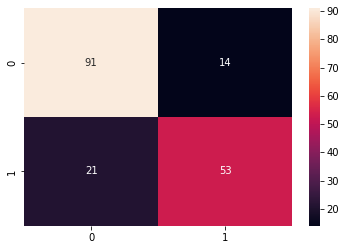

In [287]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot = True)

In [288]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [289]:
LogisticRegressionScore*100

80.44692737430168

**Random Forest Classifier**

In [290]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [291]:
RandomForestClassifierScore = rfc.score(x_test,y_test)

In [292]:
y_pred_rfc=rfc.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred_rfc)
cf_matrix

array([[92, 13],
       [24, 50]])

Text(0.5, 1.06, 'Confusion Matrix for Random Forest Classifier')

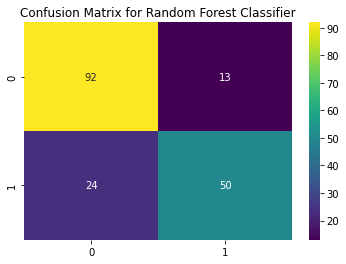

In [293]:
sns.heatmap(cf_matrix, annot=True, cmap='viridis')
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=12,y=1.06)

In [294]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [295]:
RandomForestClassifierScore*100

79.3296089385475

**Decision Tree Classifier**

In [296]:

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [297]:
DecisionTreeClassifierScore = dtc.score(x_test,y_test)

In [298]:
y_pred_dtc = dtc.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_dtc)
cf_matrix

array([[90, 15],
       [25, 49]])

Text(0.5, 1.06, 'Confusion Matrix for Decision Tree Classifier')

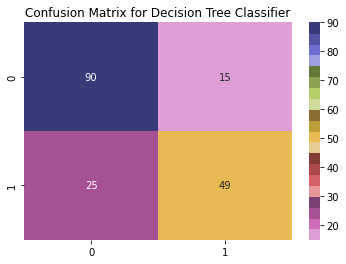

In [299]:
sns.heatmap(cf_matrix, annot=True, cmap='tab20b_r')
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize=12, y=1.06)

In [300]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       105
           1       0.77      0.66      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



In [301]:
DecisionTreeClassifierScore*100

77.6536312849162

In [302]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf,x_train,y_train,cv=2,scoring='accuracy')
print("scores :",scores)
print("mean :",scores.mean())
print("standard deviation :",scores.std())

scores : [0.76966292 0.76404494]
mean : 0.7668539325842696
standard deviation : 0.0028089887640449507


**Accuracy of three Machine Learning Models**

In [303]:
print("Accuracy obtained by LogisticRegressionModel : ",LogisticRegressionScore*100)
print("Accuracy obtained by RandomForestClassifierModel :",RandomForestClassifierScore*100)
print("Accuracy obtained by DecisionTreeClassifierModel :",DecisionTreeClassifierScore*100)

Accuracy obtained by LogisticRegressionModel :  80.44692737430168
Accuracy obtained by RandomForestClassifierModel : 79.3296089385475
Accuracy obtained by DecisionTreeClassifierModel : 77.6536312849162
